# Preprocessing and filtering of Mutual Fund data

In this notebook the Mutual data will be imported, analyzed and filtered.


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from currency_converter import CurrencyConverter
from datetime import date
import os

**We start by making a dataframe with the weekly adjusted price.**

In [125]:
#create a dataframe which we will join other dataframes to
MutualData = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/MutualFundData+cleaning/Mutual Fund data/DK0000581067.csv",index_col=0)
MutualData = MutualData.rename(columns = {"Value":"bla"}) #dummy column
MutualData.index = pd.to_datetime(MutualData.index, yearfirst = True) #change the index to a datetime index

#loop through all the files and save to a combined dataframe
for root,dirs,files in os.walk(directory):
    for file in files:
        name = "/Users/a/Dropbox/Thesis/Thesis/Coding/MutualFundData+cleaning/Mutual Fund data/"+file 
        newfile = pd.read_csv(name,index_col=0) #read in one csv file to a dataframe
        newfile = newfile.rename(columns = {"Value":file.split(".")[0]}) #rename the column
        newfile.index = pd.to_datetime(newfile.index, yearfirst = True) #change the index to datetime
        MutualData = MutualData.join(newfile) #join the new dataframe to the MutualFund dataframe
        
MutualData = MutualData.drop(columns = ["bla"]) #drop the dummy column

In [126]:
MutualData.head(20)

,DK0015966758,DK0061149119,DK0060411247,DK0061074515,DK0010270693,DK0060790087,DK0060820413,DK0015911507,DK0015168686,DK0060814952,...,DK0016275118,DK0060776094,DK0060955268,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0061075835,DK0000581083,DK0060308583
EndDate,,,,,,,,,,,,,,,,,,,,,
2005-06-30,102.010867,NaN,NaN,NaN,57.925932,NaN,NaN,144.002233,NaN,212.086619,...,103.571677,NaN,NaN,NaN,176.880671,NaN,NaN,NaN,100.000000,NaN
2005-07-01,103.295035,NaN,NaN,NaN,57.929979,NaN,NaN,145.359956,NaN,212.405554,...,103.820817,NaN,NaN,NaN,177.242539,NaN,NaN,NaN,100.000000,NaN
2005-07-02,103.295035,NaN,NaN,NaN,57.929979,NaN,NaN,145.359956,NaN,212.405554,...,103.820817,NaN,NaN,NaN,177.242539,NaN,NaN,NaN,100.000000,NaN
2005-07-03,103.295035,NaN,NaN,NaN,57.929979,NaN,NaN,145.359956,NaN,212.405554,...,103.820817,NaN,NaN,NaN,177.242539,NaN,NaN,NaN,100.000000,NaN
2005-07-04,103.954217,NaN,NaN,NaN,58.518050,NaN,NaN,147.429397,NaN,212.513229,...,103.576293,NaN,NaN,NaN,177.256902,NaN,NaN,NaN,99.739476,NaN
2005-07-05,103.190953,NaN,NaN,NaN,58.767233,NaN,NaN,146.662487,NaN,212.154314,...,103.545727,NaN,NaN,NaN,176.873796,NaN,NaN,NaN,100.000000,NaN
2005-07-06,103.641973,NaN,NaN,NaN,58.787167,NaN,NaN,146.686833,NaN,211.885128,...,103.545727,NaN,NaN,NaN,176.882653,NaN,NaN,NaN,101.467160,NaN
2005-07-07,103.098437,NaN,NaN,NaN,58.936677,NaN,NaN,146.723353,NaN,211.454431,...,103.617047,NaN,NaN,NaN,176.883551,NaN,NaN,NaN,100.575895,NaN
2005-07-08,103.341293,NaN,NaN,NaN,58.747298,NaN,NaN,146.492062,NaN,212.208151,...,103.596670,NaN,NaN,NaN,177.032113,NaN,NaN,NaN,101.782531,NaN


**See how the number of mutual funds developes over the period.**

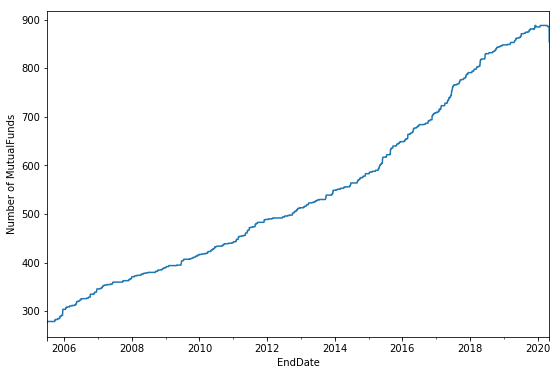

In [127]:
plt.figure(figsize=(9, 6))
MutualData.count(axis=1).plot()
plt.ylabel("Number of MutualFunds")
#plt.title("Developement of the number of ETFs in the asset universe")
plt.show()

**We want to have data from the 13-09-2014**

Throw out all the mutual funds which do not have data from that date.

Cut the front of the dataframe.

In [128]:
startdate = "13-09-2014" 

MutualData = MutualData[MutualData.index > startdate]

MutualData.head()

,DK0015966758,DK0061149119,DK0060411247,DK0061074515,DK0010270693,DK0060790087,DK0060820413,DK0015911507,DK0015168686,DK0060814952,...,DK0016275118,DK0060776094,DK0060955268,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0061075835,DK0000581083,DK0060308583
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-14,273.182841,NaN,115.143310,NaN,89.209311,113.89,NaN,329.111362,151.053943,392.179034,...,138.904070,NaN,NaN,153.133612,369.323349,155.725573,151.598209,NaN,201.179213,NaN
2014-09-15,270.368362,NaN,114.950694,NaN,88.884952,113.95,NaN,325.793597,151.125410,391.262899,...,138.932508,NaN,NaN,153.052245,368.080834,155.395540,150.697498,NaN,200.932401,NaN
2014-09-16,268.465615,NaN,114.359108,NaN,88.319939,113.88,NaN,325.548844,151.116476,390.383409,...,139.088916,NaN,NaN,152.889510,368.207720,155.455546,150.193529,NaN,201.398601,NaN
2014-09-17,270.269260,NaN,114.074708,NaN,89.125606,113.92,NaN,328.920998,151.116476,390.016955,...,138.932508,NaN,NaN,152.713214,367.873954,155.945595,151.308694,NaN,201.617990,NaN
2014-09-18,270.685486,NaN,115.263928,NaN,89.565060,113.77,NaN,328.050765,150.875276,390.090246,...,138.847195,NaN,NaN,152.808142,367.222182,156.455646,152.348801,NaN,202.948032,NaN


How many missing values does the dataframe contain?

In [129]:
MutualData.isnull().sum().sum()

301591

Drop all columns that have NaN values.

In [130]:
MutualData = MutualData.dropna(axis=1,how="any")

In [131]:
MutualData.head()

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-14,273.182841,115.143310,89.209311,113.89,329.111362,151.053943,392.179034,171.096849,159.050280,297.399495,...,137.161811,140.862160,494.923239,118.728830,138.904070,153.133612,369.323349,155.725573,151.598209,201.179213
2014-09-15,270.368362,114.950694,88.884952,113.95,325.793597,151.125410,391.262899,170.268378,158.509742,297.485748,...,136.882509,140.218954,492.050929,117.981670,138.932508,153.052245,368.080834,155.395540,150.697498,200.932401
2014-09-16,268.465615,114.359108,88.319939,113.88,325.548844,151.116476,390.383409,170.198366,158.942172,297.514499,...,136.624372,140.111753,494.386359,117.911935,139.088916,152.889510,368.207720,155.455546,150.193529,201.398601
2014-09-17,270.269260,114.074708,89.125606,113.92,328.920998,151.116476,390.016955,170.291715,159.554782,297.744506,...,136.705395,140.218954,489.514168,118.957960,138.932508,152.713214,367.873954,155.945595,151.308694,201.617990
2014-09-18,270.685486,115.263928,89.565060,113.77,328.050765,150.875276,390.090246,172.158693,160.371595,297.744506,...,137.454914,141.719768,485.581519,119.167165,138.847195,152.808142,367.222182,156.455646,152.348801,202.948032


In [132]:
MutualData.shape

(2062, 557)

This leaves us with 557 Mutual Funds

 **Now we have to calculate the returns from the prices and save that into a new dataframe.**

In [133]:
df_ret = MutualData/MutualData.shift(1)-1

In [134]:
df_ret = df_ret.resample("W-WED").agg(lambda x: (x+1).prod()-1)

In [135]:
df_ret.head()

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-17,-0.010665,-0.009281,-0.000938,0.000263,-0.000578,0.000414,-0.005513,-0.004706,0.003172,0.001160,...,-0.003328,-0.004566,-0.010929,0.001930,0.000205,-0.002745,-0.003924,0.001413,-0.001910,0.002181
2014-09-24,-0.001760,0.007648,-0.005283,0.001141,-0.009839,0.001892,0.002349,0.004111,-0.002259,0.011781,...,-0.001411,0.003823,-0.011845,-0.009631,-0.000307,0.000444,0.002771,0.002886,0.003614,0.001020
2014-10-01,-0.004334,0.006845,-0.004013,-0.000614,-0.020124,0.003422,-0.010967,0.004709,0.001207,0.013934,...,-0.020371,0.004570,-0.030966,-0.021478,0.000921,-0.009675,-0.011529,-0.002110,-0.005578,-0.013316
2014-10-08,-0.020955,-0.019812,-0.027491,0.000526,0.010652,0.001058,-0.000284,-0.029817,-0.014093,-0.000565,...,-0.025611,-0.028810,-0.027460,0.001123,0.000102,0.006364,0.001133,-0.018327,-0.020734,-0.007230
2014-10-15,-0.010852,-0.031494,-0.058609,0.000088,-0.026728,0.004229,-0.004077,-0.045856,-0.031035,0.004709,...,-0.047177,-0.046838,-0.025674,-0.034873,0.000511,-0.007838,-0.004452,-0.030093,-0.055326,-0.046054


In [136]:
df_ret.shape

(295, 557)

**Change the weekly returns from DKK to EUR.**

Downloaded the dataset from here: https://www.investing.com/currencies/dkk-eur


In [137]:
df_DKKEUR=pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/MutualFundData+cleaning/DKK_EUR Historical Data.csv", index_col=0)



In [138]:
df_DKKEUR.head()

,Price,Open,High,Low,Change %
Date,,,,,
"May 14, 2020",0.1341,0.1341,0.1341,0.1341,0.00%
"May 13, 2020",0.1341,0.1341,0.1342,0.1340,0.00%
"May 12, 2020",0.1341,0.1341,0.1342,0.1340,0.00%
"May 11, 2020",0.1341,0.1340,0.1343,0.1340,0.00%
"May 08, 2020",0.1341,0.1340,0.1342,0.1339,0.00%


Change the index to datetime

In [139]:
df_DKKEUR.index.dtype

dtype('O')

In [140]:
df_DKKEUR.index = pd.to_datetime(df_DKKEUR.index)

In [141]:
df_DKKEUR = df_DKKEUR.sort_index()

In [142]:
df_DKKEUR

,Price,Open,High,Low,Change %
Date,,,,,
2005-04-14,0.1341,0.1342,0.1344,0.1340,0.00%
2005-04-15,0.1343,0.1341,0.1346,0.1337,0.15%
2005-04-18,0.1341,0.1341,0.1343,0.1340,-0.15%
2005-04-19,0.1341,0.1342,0.1344,0.1340,0.00%
2005-04-20,0.1343,0.1341,0.1344,0.1339,0.15%
...,...,...,...,...,...
2020-05-08,0.1341,0.1340,0.1342,0.1339,0.00%
2020-05-11,0.1341,0.1340,0.1343,0.1340,0.00%
2020-05-12,0.1341,0.1341,0.1342,0.1340,0.00%


The Change % column is an object, we need to change that to int and add two zeros in front of each number.

In [143]:
df_DKKEUR["Change %"]=df_DKKEUR["Change %"].str.split('%').str[0].tolist()

In [144]:
df_DKKEUR["Change %"]=df_DKKEUR["Change %"].astype("float64")

In [145]:
df_DKKEUR["Change %"] = df_DKKEUR["Change %"]*0.01

In [146]:
df_DKKEUR.tail(10)

,Price,Open,High,Low,Change %
Date,,,,,
2020-05-01,0.1340,0.1340,0.1341,0.1339,0.0004
2020-05-04,0.1340,0.1340,0.1341,0.1339,0.0000
2020-05-05,0.1340,0.1341,0.1342,0.1339,0.0000
2020-05-06,0.1340,0.1340,0.1341,0.1339,0.0000
2020-05-07,0.1340,0.1340,0.1341,0.1339,0.0000
2020-05-08,0.1341,0.1340,0.1342,0.1339,0.0000
2020-05-11,0.1341,0.1340,0.1343,0.1340,0.0000
2020-05-12,0.1341,0.1341,0.1342,0.1340,0.0000
2020-05-13,0.1341,0.1341,0.1342,0.1340,0.0000


Calculate the cumulative weekly return on DKKEUR

In [147]:
df_DKKEUR_weekly = df_DKKEUR["Change %"].resample("W-WED").agg(lambda x: (x+1).prod()-1)

In [148]:
df_DKKEUR_weekly

Date
2005-04-20    1.497747e-03
2005-04-27   -4.900000e-07
2005-05-04    0.000000e+00
2005-05-11   -3.787690e-06
2005-05-18   -2.250000e-06
                  ...     
2020-04-22    0.000000e+00
2020-04-29    0.000000e+00
2020-05-06   -5.003600e-04
2020-05-13    0.000000e+00
2020-05-20    0.000000e+00
Freq: W-WED, Name: Change %, Length: 788, dtype: float64

Join the dataframes together

In [149]:
df_ret=df_ret.join(df_DKKEUR_weekly)

In [150]:
df_ret

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083,Change %
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-17,-0.010665,-0.009281,-0.000938,0.000263,-0.000578,0.000414,-0.005513,-0.004706,0.003172,0.001160,...,-0.004566,-0.010929,0.001930,0.000205,-0.002745,-0.003924,0.001413,-0.001910,0.002181,0.0000
2014-09-24,-0.001760,0.007648,-0.005283,0.001141,-0.009839,0.001892,0.002349,0.004111,-0.002259,0.011781,...,0.003823,-0.011845,-0.009631,-0.000307,0.000444,0.002771,0.002886,0.003614,0.001020,0.0000
2014-10-01,-0.004334,0.006845,-0.004013,-0.000614,-0.020124,0.003422,-0.010967,0.004709,0.001207,0.013934,...,0.004570,-0.030966,-0.021478,0.000921,-0.009675,-0.011529,-0.002110,-0.005578,-0.013316,0.0000
2014-10-08,-0.020955,-0.019812,-0.027491,0.000526,0.010652,0.001058,-0.000284,-0.029817,-0.014093,-0.000565,...,-0.028810,-0.027460,0.001123,0.000102,0.006364,0.001133,-0.018327,-0.020734,-0.007230,0.0000
2014-10-15,-0.010852,-0.031494,-0.058609,0.000088,-0.026728,0.004229,-0.004077,-0.045856,-0.031035,0.004709,...,-0.046838,-0.025674,-0.034873,0.000511,-0.007838,-0.004452,-0.030093,-0.055326,-0.046054,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-08,0.048195,0.044459,0.061315,0.001451,0.058222,-0.000365,0.002041,0.054293,0.062952,-0.006879,...,0.055014,0.097629,0.054643,0.001257,-0.008795,0.001858,0.044442,0.067785,0.035393,-0.0004
2020-04-15,0.007688,0.012036,0.013454,0.006477,0.023557,0.004808,0.016291,0.010681,0.016507,0.005195,...,0.010320,-0.037367,0.011864,0.001884,0.051813,0.016337,0.014883,0.025909,0.042268,0.0011
2020-04-22,0.015552,-0.017020,0.012160,0.002202,0.033286,0.000121,-0.021898,0.022646,0.009546,0.000635,...,0.022581,0.002689,0.035541,0.000731,-0.011144,-0.022150,0.012041,0.014363,-0.026021,0.0000


And finally we want to calculate the EUR returns for the indexes.

In [151]:
for i in range(0, df_ret.shape[1]-1):
    df_ret.iloc[:,i]=(df_ret.iloc[:,i]+1)*(df_ret["Change %"]+1)-1

In [152]:
df_ret.shape

(295, 558)

In [153]:
df_ret

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083,Change %
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-17,-0.010665,-0.009281,-0.000938,0.000263,-0.000578,0.000414,-0.005513,-0.004706,0.003172,0.001160,...,-0.004566,-0.010929,0.001930,0.000205,-0.002745,-0.003924,0.001413,-0.001910,0.002181,0.0000
2014-09-24,-0.001760,0.007648,-0.005283,0.001141,-0.009839,0.001892,0.002349,0.004111,-0.002259,0.011781,...,0.003823,-0.011845,-0.009631,-0.000307,0.000444,0.002771,0.002886,0.003614,0.001020,0.0000
2014-10-01,-0.004334,0.006845,-0.004013,-0.000614,-0.020124,0.003422,-0.010967,0.004709,0.001207,0.013934,...,0.004570,-0.030966,-0.021478,0.000921,-0.009675,-0.011529,-0.002110,-0.005578,-0.013316,0.0000
2014-10-08,-0.020955,-0.019812,-0.027491,0.000526,0.010652,0.001058,-0.000284,-0.029817,-0.014093,-0.000565,...,-0.028810,-0.027460,0.001123,0.000102,0.006364,0.001133,-0.018327,-0.020734,-0.007230,0.0000
2014-10-15,-0.010852,-0.031494,-0.058609,0.000088,-0.026728,0.004229,-0.004077,-0.045856,-0.031035,0.004709,...,-0.046838,-0.025674,-0.034873,0.000511,-0.007838,-0.004452,-0.030093,-0.055326,-0.046054,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-08,0.047775,0.044041,0.060891,0.001050,0.057798,-0.000765,0.001640,0.053871,0.062527,-0.007276,...,0.054592,0.097190,0.054221,0.000857,-0.009191,0.001457,0.044024,0.067358,0.034978,-0.0004
2020-04-15,0.008796,0.013150,0.014569,0.007585,0.024684,0.005913,0.017409,0.011793,0.017625,0.006301,...,0.011432,-0.036308,0.012977,0.002986,0.052970,0.017455,0.015999,0.027037,0.043415,0.0011
2020-04-22,0.015552,-0.017020,0.012160,0.002202,0.033286,0.000121,-0.021898,0.022646,0.009546,0.000635,...,0.022581,0.002689,0.035541,0.000731,-0.011144,-0.022150,0.012041,0.014363,-0.026021,0.0000


**Drop the change % column from the dataframe.**

In [154]:
df_ret=df_ret.drop(columns=["Change %"])

**Now we want to print out the dataframe and save into csv file.**

In [155]:
df_ret.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-MutualFundRet.csv")